<a href="https://colab.research.google.com/github/reynardofarreltj/reynardofarreltj/blob/main/Contoh_Pengunaan_MetodeIQR" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Penjualan Manga Terlaris

Notebook ini berisi analisis data penjualan manga terlaris, termasuk visualisasi distribusi penjualan sebelum dan sesudah menghilangkan data outlier.

## Langkah 1: Persiapan dan Memuat Data

Sebelum menjalankan kode, pastikan Anda telah mengunggah file `best-selling-manga.csv` ke Google Colab.

1. Klik ikon **folder** di sidebar kiri.
2. Klik tombol **'Upload to session storage'**.
3. Pilih file `best-selling-manga.csv` dari komputer Anda.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nama file yang diunggah
file_name = 'best-selling-manga.csv'

# Membaca dataset
df = pd.read_csv(file_name)

# Kolom yang akan dianalisis
sales_column = 'Approximate sales in million(s)'

# Menampilkan 5 baris pertama untuk verifikasi
print("Data Penjualan Manga Terlaris:")
df.head()

Data Penjualan Manga Terlaris:


Manga series                      Author(s)   Publisher  \
0                      One Piece                   Eiichiro Oda    Shueisha   
1                       Golgo 13  Takao Saito, Saito Production  Shogakukan   
2  Case Closed / Detective Conan                   Gosho Aoyama  Shogakukan   
3                    Dragon Ball                 Akira Toriyama    Shueisha   
4                       Doraemon                Fujiko F. Fujio  Shogakukan   

  Demographic  No. of collected volumes    Serialized  \
0      Shōnen                       104  1997–present   
1      Seinen                       207  1968–present   
2      Shōnen                       102  1994–present   
3      Shōnen                        42     1984–1995   
4    Children                        45     1969–1996   

   Approximate sales in million(s)  Average sales per volume in million(s)  
0                            516.6                                    4.97  
1                            300.0                                    1.45  
2                            270.0                                    2.65  
3                            260.0                                    6.19  
4                            250.0                                    4.71

## Langkah 2: Histogram Sebelum Penghapusan Outlier

Kita akan membuat histogram untuk melihat distribusi awal dari data perkiraan penjualan manga.

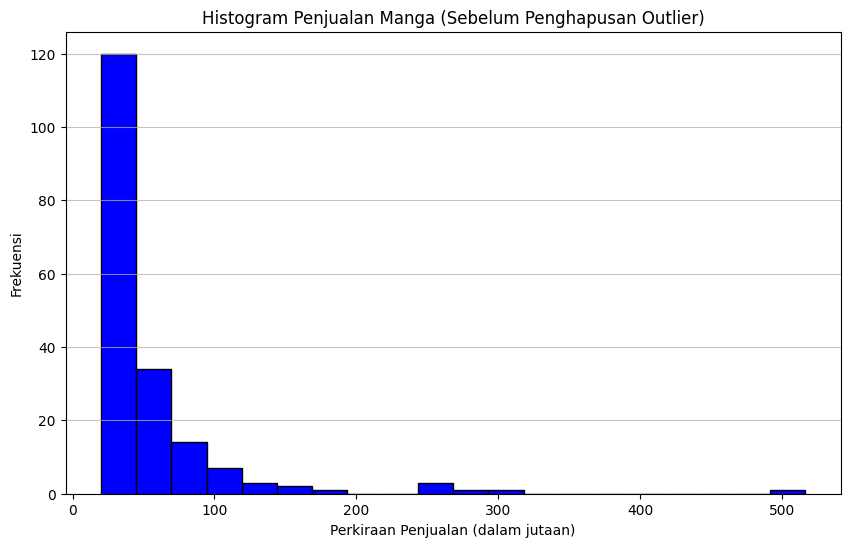

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df[sales_column], bins=20, color='blue', edgecolor='black')
plt.title('Histogram Penjualan Manga (Sebelum Penghapusan Outlier)')
plt.xlabel('Perkiraan Penjualan (dalam jutaan)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Langkah 3: Deteksi dan Penghapusan Outlier

Kita akan menggunakan metode Interquartile Range (IQR) untuk mengidentifikasi nilai-nilai ekstrem (outlier). Dari histogram di atas, terlihat jelas bahwa beberapa manga memiliki penjualan yang jauh lebih tinggi dibandingkan mayoritas lainnya. Mari kita identifikasi secara statistik.

In [4]:
# Menghitung Q1, Q3, dan IQR
Q1 = df[sales_column].quantile(0.25)
Q3 = df[sales_column].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah (Lower Bound): {lower_bound:.2f} juta")
print(f"Batas Atas (Upper Bound): {upper_bound:.2f} juta")

# Menampilkan data yang dianggap outlier
outliers = df[(df[sales_column] < lower_bound) | (df[sales_column] > upper_bound)]
print(f"\nData Outlier ({len(outliers)} manga):\n", outliers[['Manga series', sales_column]])

# Membuat dataframe baru tanpa outlier
df_no_outliers = df[df[sales_column] <= upper_bound]

# Menampilkan jumlah outlier yang dihapus
print(f"\nJumlah baris data asli: {len(df)}")
print(f"Jumlah baris data setelah outlier dihapus: {len(df_no_outliers)}")
print(f"Jumlah outlier yang dihapus: {len(df) - len(df_no_outliers)}")

Batas Bawah (Lower Bound): -14.50 juta
Batas Atas (Upper Bound): 89.50 juta

Data Outlier (20 manga):
                       Manga series  Approximate sales in million(s)
0                        One Piece                            516.6
1                         Golgo 13                            300.0
2    Case Closed / Detective Conan                            270.0
3                      Dragon Ball                            260.0
4                         Doraemon                            250.0
5                           Naruto                            250.0
6                        Slam Dunk                            170.0
7       KochiKame: Tokyo Beat Cops                            156.5
8   Demon Slayer: Kimetsu no Yaiba                            150.0
9                         Oishinbo                            135.0
10                          Bleach                            130.0
11        JoJo's Bizarre Adventure                            120.0
12           

## Langkah 4: Histogram Sesudah Penghapusan Outlier

Sekarang kita membuat ulang histogram dari data yang telah bersih dari outlier. Ini akan memberikan gambaran yang lebih jelas tentang distribusi penjualan untuk sebagian besar manga.

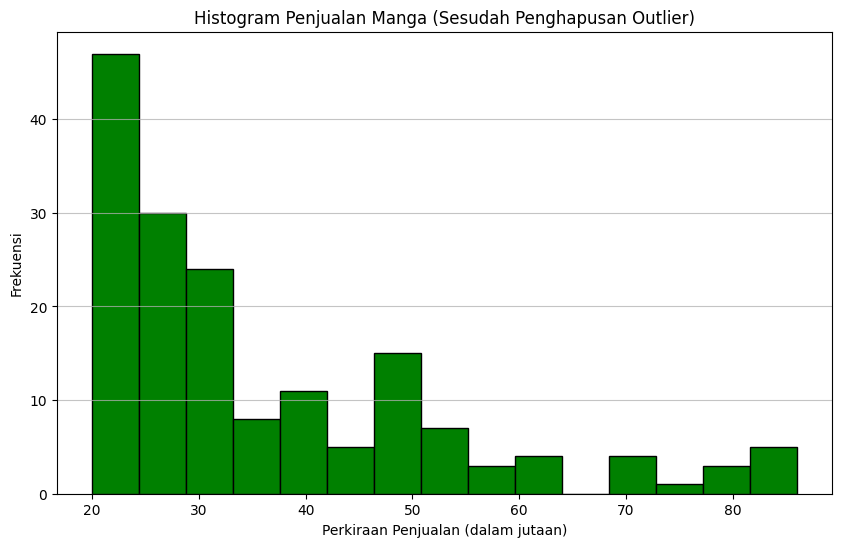

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[sales_column], bins=15, color='green', edgecolor='black')
plt.title('Histogram Penjualan Manga (Sesudah Penghapusan Outlier)')
plt.xlabel('Perkiraan Penjualan (dalam jutaan)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()